In [1]:
# Import the necessary packages & libraries
import pandas as pd
from pandas.api.types import CategoricalDtype
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
# Load the data set into the pandas data frame by using read_csv command
churn_df = pd.read_csv(r'C:\Users\ashle\Downloads\D206 Churn.files\churn_raw_data.csv')

In [3]:
# Print first 5 rows to get an idea of the datatypes being used, what columns will need to be cleaned, and other extractions that may need to be performed.
churn_df.head()

,Unnamed: 0,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
0,1,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,171.449762,904.536110,5,5,5,3,4,4,3,4
1,2,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.948015,800.982766,3,4,3,3,4,3,4,4
2,3,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.440398,2054.706961,4,4,2,4,4,3,3,3
3,4,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,120.249493,2164.579412,4,4,4,2,5,4,3,3
4,5,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,150.761216,271.493436,4,4,4,3,4,4,4,5


In [4]:
# Remove the duplicate column, "Unnamed"
df = churn_df.drop(churn_df.columns[0], axis = 1)

In [5]:
# Rename the survey columns to describe the variables better
df.rename(columns={'item1': 'Responses',
                    'item2': 'Fixes',
                    'item3': 'Replacements',
                    'item4': 'Reliability',
                    'item5': 'Options',
                    'item6': 'Respectfulness',
                    'item7': 'Courteous',
                    'item8': 'Listening'}, inplace=True)
print(df.columns)

Index(['CaseOrder', 'Customer_id', 'Interaction', 'City', 'State', 'County',
       'Zip', 'Lat', 'Lng', 'Population', 'Area', 'Timezone', 'Job',
       'Children', 'Age', 'Education', 'Employment', 'Income', 'Marital',
       'Gender', 'Churn', 'Outage_sec_perweek', 'Email', 'Contacts',
       'Yearly_equip_failure', 'Techie', 'Contract', 'Port_modem', 'Tablet',
       'InternetService', 'Phone', 'Multiple', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'PaymentMethod', 'Tenure',
       'MonthlyCharge', 'Bandwidth_GB_Year', 'Responses', 'Fixes',
       'Replacements', 'Reliability', 'Options', 'Respectfulness', 'Courteous',
       'Listening'],
      dtype='object')


In [6]:
 # Find the rows that contain missing values 
df.isnull().any(axis=1)

0        True
1       False
2        True
3       False
4       False
        ...  
9995     True
9996     True
9997     True
9998    False
9999     True
Length: 10000, dtype: bool

In [7]:
# Find the columns that contain NAs (missing values = "True"; columns are "Children", "Age", "Income", "Techie", "InternetService", "Phone", "TechSupport", "Tenure", "Bandwidth_GB_Year")
df.isna().any()

CaseOrder               False
Customer_id             False
Interaction             False
City                    False
State                   False
County                  False
Zip                     False
Lat                     False
Lng                     False
Population              False
Area                    False
Timezone                False
Job                     False
Children                 True
Age                      True
Education               False
Employment              False
Income                   True
Marital                 False
Gender                  False
Churn                   False
Outage_sec_perweek      False
Email                   False
Contacts                False
Yearly_equip_failure    False
Techie                   True
Contract                False
Port_modem              False
Tablet                  False
InternetService          True
Phone                    True
Multiple                False
OnlineSecurity          False
OnlineBack

In [8]:
# Verify the missing values (number below shows how many records contain missing data)
print("Missing values distribution: ")
print(df.isnull().sum())
print("")

Missing values distribution: 
CaseOrder                  0
Customer_id                0
Interaction                0
City                       0
State                      0
County                     0
Zip                        0
Lat                        0
Lng                        0
Population                 0
Area                       0
Timezone                   0
Job                        0
Children                2495
Age                     2475
Education                  0
Employment                 0
Income                  2490
Marital                    0
Gender                     0
Churn                      0
Outage_sec_perweek         0
Email                      0
Contacts                   0
Yearly_equip_failure       0
Techie                  2477
Contract                   0
Port_modem                 0
Tablet                     0
InternetService         2129
Phone                   1026
Multiple                   0
OnlineSecurity             0
OnlineBackup 

In [9]:
# Check the datatype in each column (numerical = int64 and float64; categorical = object)
print("Column datatypes: ")
print(df.dtypes)

Column datatypes: 
CaseOrder                 int64
Customer_id              object
Interaction              object
City                     object
State                    object
County                   object
Zip                       int64
Lat                     float64
Lng                     float64
Population                int64
Area                     object
Timezone                 object
Job                      object
Children                float64
Age                     float64
Education                object
Employment               object
Income                  float64
Marital                  object
Gender                   object
Churn                    object
Outage_sec_perweek      float64
Email                     int64
Contacts                  int64
Yearly_equip_failure      int64
Techie                   object
Contract                 object
Port_modem               object
Tablet                   object
InternetService          object
Phone                

In [10]:
# Inspect the categorical data for misspellings or outliers using the unique() command
df['State'].unique()

array(['AK', 'MI', 'OR', 'CA', 'TX', 'GA', 'TN', 'OK', 'FL', 'OH', 'PA',
       'PR', 'IA', 'ME', 'IL', 'WI', 'NC', 'AL', 'NM', 'VT', 'MD', 'NY',
       'WA', 'CT', 'NJ', 'DC', 'ND', 'LA', 'NE', 'WV', 'AZ', 'MO', 'WY',
       'MT', 'VA', 'KY', 'MN', 'KS', 'MA', 'IN', 'SC', 'NH', 'DE', 'MS',
       'ID', 'AR', 'SD', 'CO', 'HI', 'UT', 'RI', 'NV'], dtype=object)

In [11]:
df['Area'].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [12]:
df['Timezone'].unique()

array(['America/Sitka', 'America/Detroit', 'America/Los_Angeles',
       'America/Chicago', 'America/New_York', 'America/Puerto_Rico',
       'America/Denver', 'America/Menominee', 'America/Phoenix',
       'America/Indiana/Indianapolis', 'America/Boise',
       'America/Kentucky/Louisville', 'Pacific/Honolulu',
       'America/Indiana/Petersburg', 'America/Nome', 'America/Anchorage',
       'America/Indiana/Knox', 'America/Juneau', 'America/Toronto',
       'America/Indiana/Winamac', 'America/Indiana/Vincennes',
       'America/North_Dakota/New_Salem', 'America/Indiana/Tell_City',
       'America/Indiana/Marengo', 'America/Ojinaga'], dtype=object)

In [13]:
df['Children'].unique()

array([nan,  1.,  4.,  0.,  3.,  2.,  7.,  5.,  9.,  6., 10.,  8.])

In [14]:
df['Age'].unique()

array([68., 27., 50., 48., 83., nan, 49., 86., 23., 56., 30., 39., 63.,
       60., 61., 52., 75., 77., 47., 70., 69., 45., 40., 82., 26., 25.,
       66., 72., 41., 44., 43., 84., 59., 31., 51., 58., 73., 33., 42.,
       81., 87., 54., 67., 46., 24., 20., 71., 32., 29., 80., 53., 79.,
       65., 35., 34., 74., 55., 76., 57., 38., 78., 19., 36., 88., 62.,
       37., 28., 22., 85., 89., 18., 21., 64.])

In [15]:
# Sort by age to determine if there are any outliers, but also any misspellings
age_range = df['Age'].unique()
print(sorted(age_range))

[23.0, 25.0, 26.0, 27.0, 30.0, 31.0, 39.0, 40.0, 41.0, 43.0, 44.0, 45.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 59.0, 61.0, 68.0, 83.0, nan, 18.0, 19.0, 20.0, 21.0, 22.0, 24.0, 28.0, 29.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 42.0, 46.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 60.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0]


In [16]:
df['Education'].unique()

array(["Master's Degree", 'Regular High School Diploma',
       'Doctorate Degree', 'No Schooling Completed', "Associate's Degree",
       "Bachelor's Degree", 'Some College, Less than 1 Year',
       'GED or Alternative Credential',
       'Some College, 1 or More Years, No Degree',
       '9th Grade to 12th Grade, No Diploma',
       'Nursery School to 8th Grade', 'Professional School Degree'],
      dtype=object)

In [17]:
df['Employment'].unique()

array(['Part Time', 'Retired', 'Student', 'Full Time', 'Unemployed'],
      dtype=object)

In [18]:
df['Marital'].unique()

array(['Widowed', 'Married', 'Separated', 'Never Married', 'Divorced'],
      dtype=object)

In [19]:
df['Gender'].unique()

array(['Male', 'Female', 'Prefer not to answer'], dtype=object)

In [20]:
df['Contract'].unique()

array(['One year', 'Month-to-month', 'Two Year'], dtype=object)

In [21]:
df['PaymentMethod'].unique()

array(['Credit Card (automatic)', 'Bank Transfer(automatic)',
       'Mailed Check', 'Electronic Check'], dtype=object)

In [22]:
# Identify duplicates if there are any that we have not already removed
data_duplicates = df.loc[df.duplicated()]
print(data_duplicates)

Empty DataFrame
Columns: [CaseOrder, Customer_id, Interaction, City, State, County, Zip, Lat, Lng, Population, Area, Timezone, Job, Children, Age, Education, Employment, Income, Marital, Gender, Churn, Outage_sec_perweek, Email, Contacts, Yearly_equip_failure, Techie, Contract, Port_modem, Tablet, InternetService, Phone, Multiple, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, PaperlessBilling, PaymentMethod, Tenure, MonthlyCharge, Bandwidth_GB_Year, Responses, Fixes, Replacements, Reliability, Options, Respectfulness, Courteous, Listening]
Index: []

[0 rows x 51 columns]


In [23]:
# Create histograms of the quantitative variables with missing data to determine whether to replace the missing values with mean or median 
df[['Children', 'Age', 'Income', 'Tenure','Bandwidth_GB_Year']].hist()
plt.savefig('churn_histogram.jpg')
plt.tight_layout()
plt.close()

In [24]:
# Treat the missing data by replacing the value with mean or median 
df['Children'] = df['Children'].fillna(df['Children'].median())
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Income'] = df['Income'].fillna(df['Income'].median())
df['Tenure'] = df['Tenure'].fillna(df['Tenure'].median())
df['Bandwidth_GB_Year'] = df['Bandwidth_GB_Year'].fillna(df['Bandwidth_GB_Year'].median())

In [25]:
# Treat the missing categorical data by replacing the value with mode
df['Techie'] = df['Techie'].fillna(df['Techie'].mode()[0])
df['InternetService'] = df['InternetService'].fillna(df['InternetService'].mode()[0])
df['Phone'] = df['Phone'].fillna(df['Phone'].mode()[0])
df['TechSupport'] = df['TechSupport'].fillna(df['TechSupport'].mode()[0])

In [26]:
# Find the count of missing values to double check there is not any
null_data = df.isnull().sum()
print(null_data)

CaseOrder               0
Customer_id             0
Interaction             0
City                    0
State                   0
County                  0
Zip                     0
Lat                     0
Lng                     0
Population              0
Area                    0
Timezone                0
Job                     0
Children                0
Age                     0
Education               0
Employment              0
Income                  0
Marital                 0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
PaperlessBil

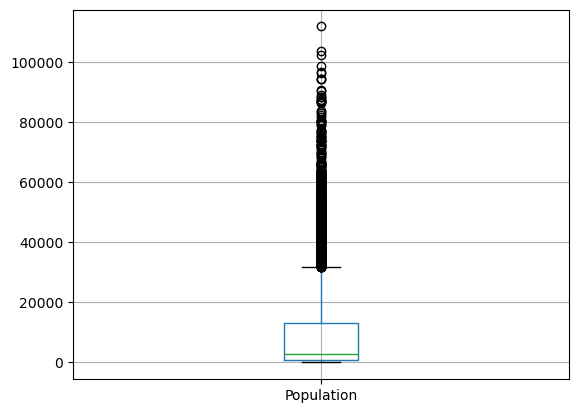

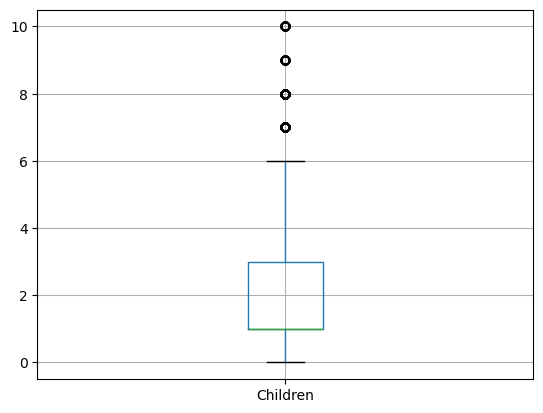

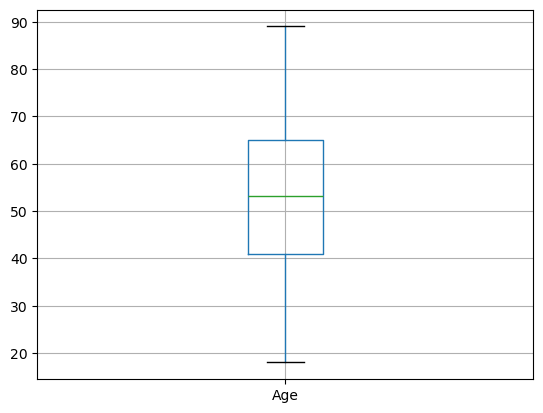

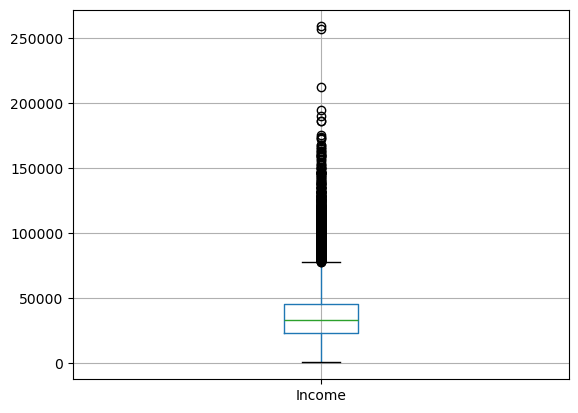

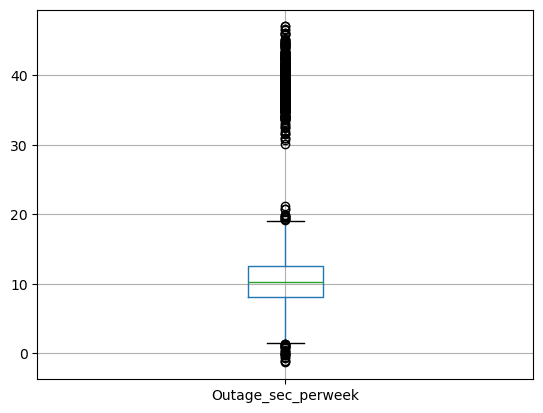

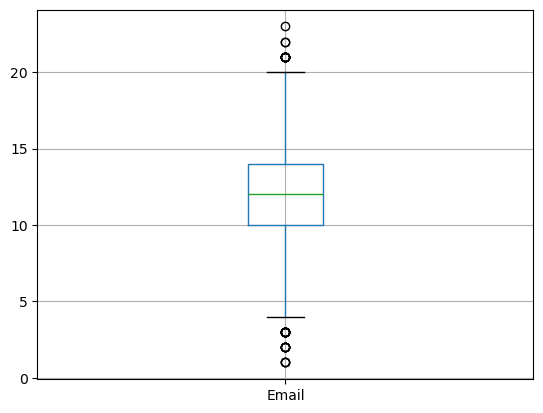

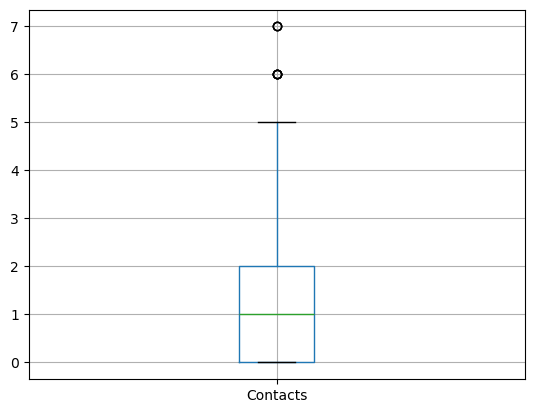

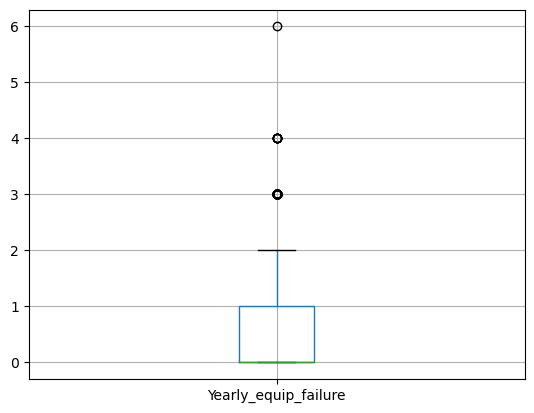

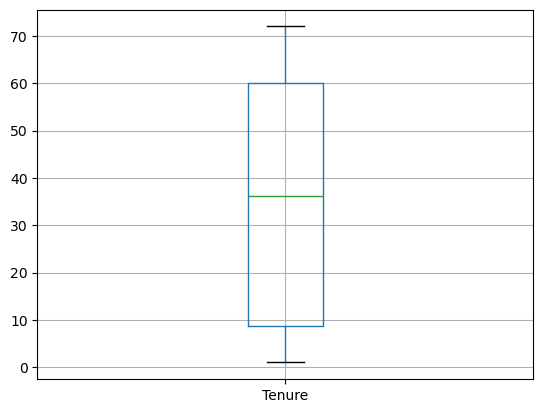

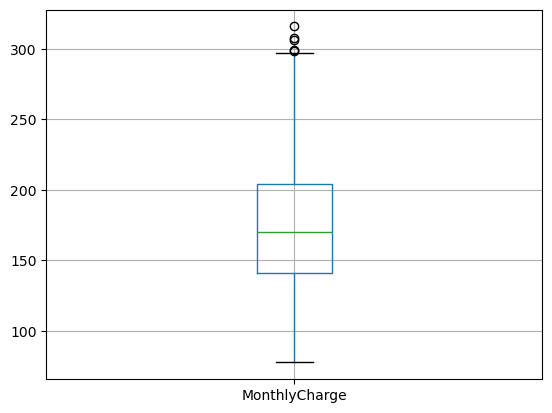

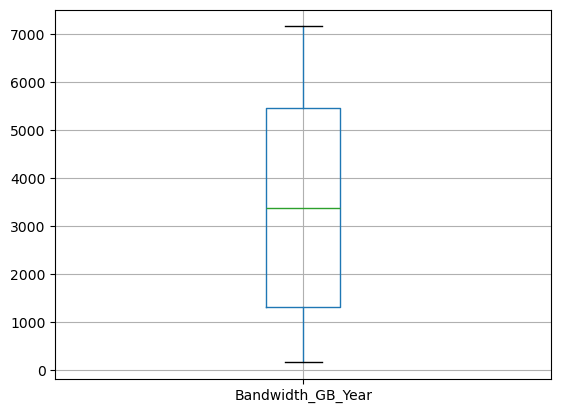

In [27]:
# Find outliers of quantitative variables using boxplots
df.boxplot(['Population'])
plt.show()
df[['Children']].boxplot()
plt.show()
df[['Age']].boxplot()
plt.show()
df[['Income']].boxplot()
plt.show()
df[['Outage_sec_perweek']].boxplot()
plt.show()
df[['Email']].boxplot()
plt.show()
df[['Contacts']].boxplot()
plt.show()
df[['Yearly_equip_failure']].boxplot()
plt.show()
df[['Tenure']].boxplot()
plt.show()
df[['MonthlyCharge']].boxplot()
plt.show()
df[['Bandwidth_GB_Year']].boxplot()
plt.show()

In [28]:
# Treat the outliers and determine whether to keep, replace, or remove them from the dataset
print(df[['Population', 'Children', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 'MonthlyCharge']].describe())

          Population      Children         Income  Outage_sec_perweek  \
count   10000.000000  10000.000000   10000.000000        10000.000000   
mean     9756.562400      1.822500   38256.017897           11.452955   
std     14432.698671      1.925971   24747.872761            7.025921   
min         0.000000      0.000000     740.660000           -1.348571   
25%       738.000000      1.000000   23660.790000            8.054362   
50%      2910.500000      1.000000   33186.785000           10.202896   
75%     13168.000000      3.000000   45504.192500           12.487644   
max    111850.000000     10.000000  258900.700000           47.049280   

              Email      Contacts  Yearly_equip_failure  MonthlyCharge  
count  10000.000000  10000.000000          10000.000000   10000.000000  
mean      12.016000      0.994200              0.398000     174.076305  
std        3.025898      0.988466              0.635953      43.335473  
min        1.000000      0.000000              0.0

In [29]:
# Replace any negative values (outliers) with 0, then use describe() function to confirm negative values have been replaced
df['Outage_sec_perweek'] = df['Outage_sec_perweek'].clip(lower=0)
print(df['Outage_sec_perweek'].describe())

count    10000.000000
mean        11.453592
std          7.024842
min          0.000000
25%          8.054362
50%         10.202896
75%         12.487644
max         47.049280
Name: Outage_sec_perweek, dtype: float64


In [30]:
# Extract the clean dataset
df.to_csv('D206_churn_clean.csv', index=False)
df.head()

,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,...,MonthlyCharge,Bandwidth_GB_Year,Responses,Fixes,Replacements,Reliability,Options,Respectfulness,Courteous,Listening
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,...,171.449762,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,...,242.948015,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,...,159.440398,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,...,120.249493,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,...,150.761216,271.493436,4,4,4,3,4,4,4,5


In [31]:
# Define and store the quantitative(continuous) variables in a new data frame for PCA
churn_quantitative = df[['Population','Outage_sec_perweek','Email','Contacts','Yearly_equip_failure','Tenure','MonthlyCharge','Bandwidth_GB_Year']]

In [32]:
# Normalize the data by using standardization
churn_normalized = (churn_quantitative-churn_quantitative.mean())/churn_quantitative.std()

In [33]:
# Set the number of Principal Components (PCs)
pca = PCA(n_components=churn_quantitative.shape[1])

In [34]:
# Fit the normalized data into our PCA
pca.fit(churn_normalized)

PCA(n_components=8)

In [35]:
# Convert the PCA back to a data frame
churn_pca = pd.DataFrame(pca.transform(churn_normalized), 
columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8'])

In [36]:
# Generate the PCA loadings, the variables that contribute the most to the PCs
loadings = pd.DataFrame(pca.components_.T, 
columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8'],
index=churn_normalized.columns)

In [37]:
# Print the loadings (take the absolute value to know the type of relationship)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
Population,-0.000437,-0.053644,0.515655,-0.425926,0.515193,0.533274,-0.001708,-0.000784
Outage_sec_perweek,0.022311,0.705254,-0.011774,-0.042591,0.042696,0.009342,0.705873,0.000145
Email,-0.021184,0.058663,0.637311,-0.248775,-0.093277,-0.719096,-0.047164,0.005641
Contacts,0.004731,0.001993,0.257825,0.800978,0.526818,-0.118255,0.020190,-0.002188
Yearly_equip_failure,0.015966,0.057290,-0.509243,-0.331953,0.665998,-0.410746,-0.121116,-0.002565
Tenure,0.705063,-0.057060,0.014936,-0.007196,-0.010416,-0.016213,0.035530,-0.705494
MonthlyCharge,0.045318,0.699757,0.040315,0.055431,-0.052714,0.124348,-0.695006,-0.048099
Bandwidth_GB_Year,0.706829,-0.009790,0.012085,-0.000614,-0.008625,-0.003247,-0.011976,0.707051


In [38]:
# Calculate the covariance and vectors then define the eigenvalues
cov_matrix = np.dot(churn_normalized.T, churn_normalized) / churn_quantitative.shape[0]
eigenvalues = [np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)) for eigenvector in pca.components_]

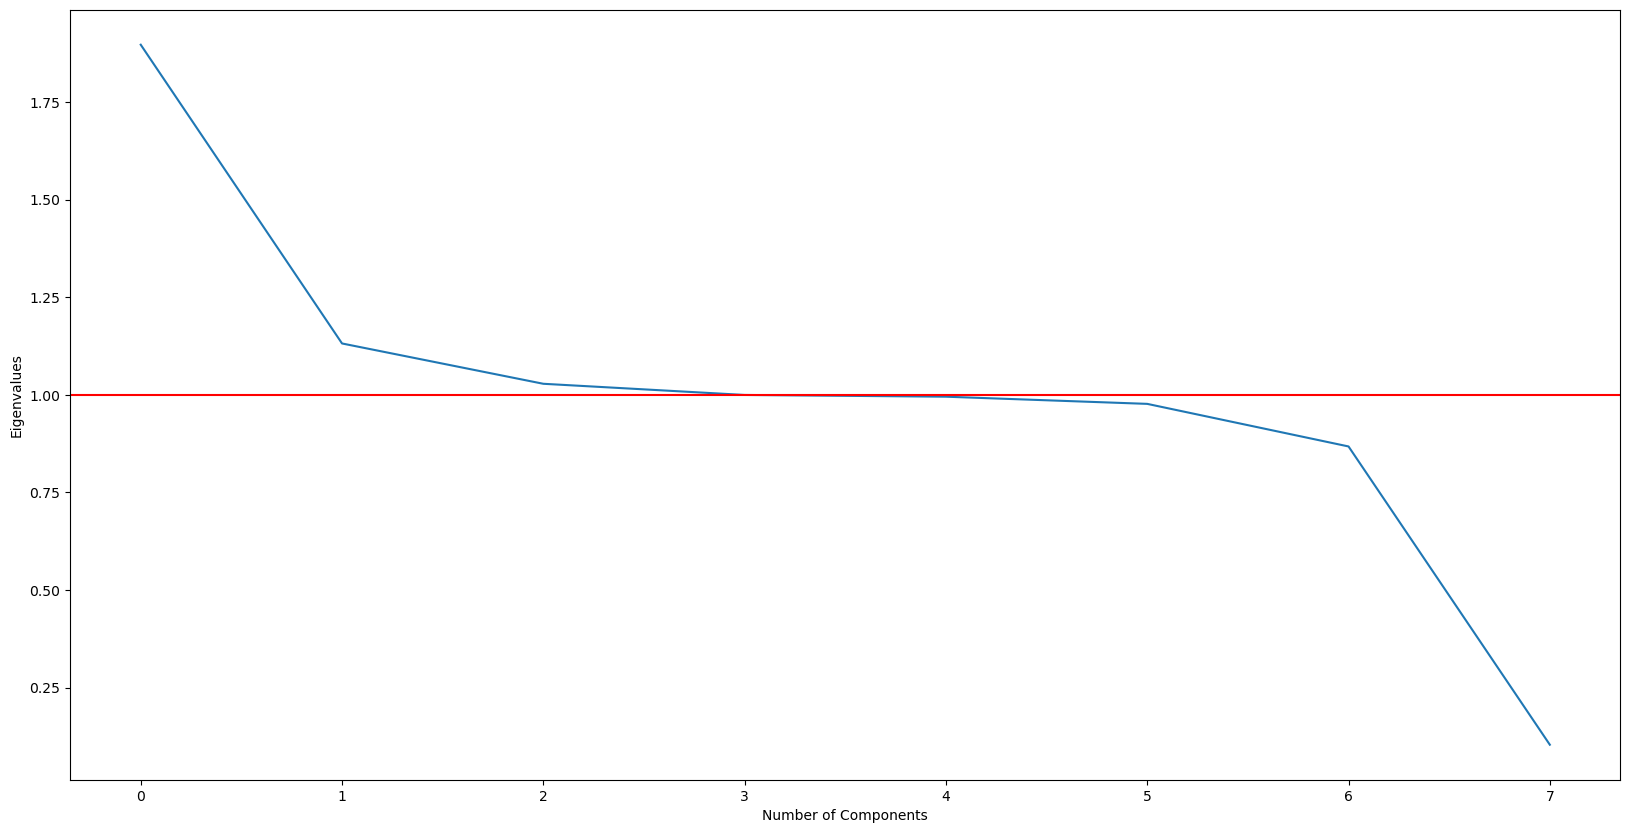

In [39]:
# Create a scree plot to identify which PCs to keep (values greater than 1)
plt.figure(figsize = [20,10])
plt.plot(eigenvalues)
plt.xlabel('Number of Components')
plt.ylabel('Eigenvalues')
plt.axhline(y=1, color='red')
plt.show()

In [40]:
# Print the eigenvalues 
eigenvalues

[1.8965809418467252,
 1.1314610121134865,
 1.028200990169685,
 0.9995946415372766,
 0.9951289473826883,
 0.9767574382832768,
 0.8676886755886392,
 0.10378735307844683]